   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Silhouette Score: 0.46
K-Medoids Silhouette Score: 0.46


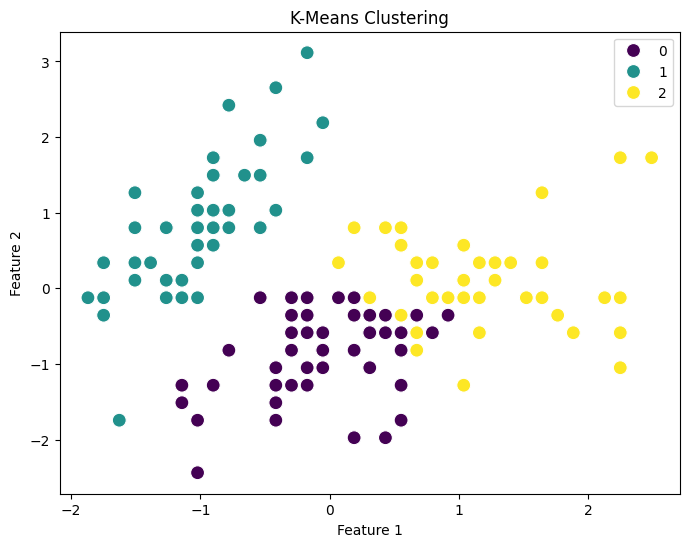

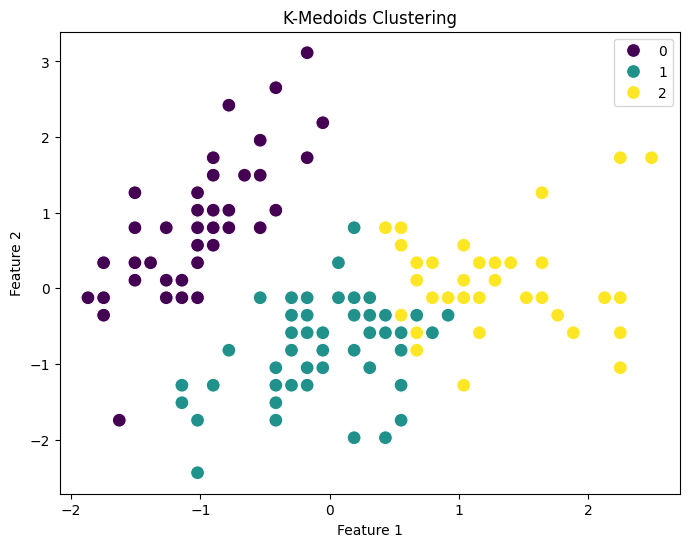

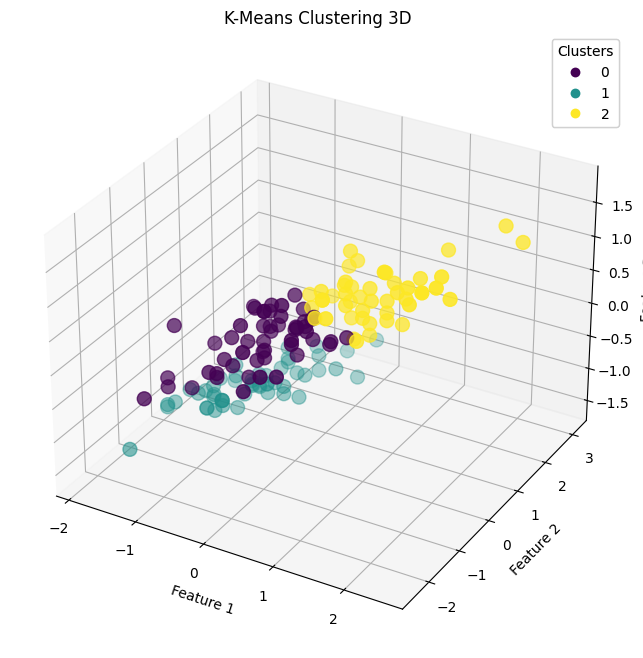

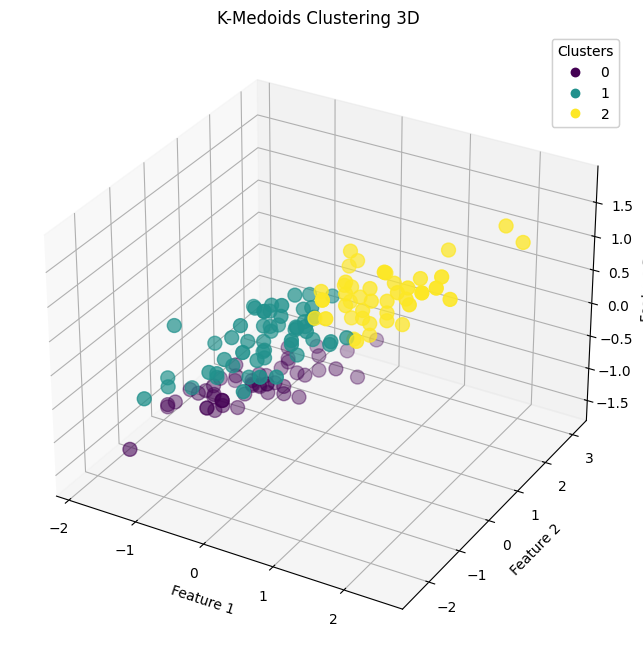

K-Means vs Actual: Species   0   1   2
row_0              
0         0  39  14
1        50   0   0
2         0  11  36
K-Medoids vs Actual: Species   0   1   2
row_0              
0        50   0   0
1         0  41  15
2         0   9  35


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv("Iris.csv")

# Prepare the features
X = data.drop(columns=["Id", "Species"])

# Normalize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply k-medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Silhouette scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.2f}")

# Visualization in 2D
def plot_clusters_2d(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=100)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_clusters_2d(X_scaled, kmeans_labels, "K-Means Clustering")
plot_clusters_2d(X_scaled, kmedoids_labels, "K-Medoids Clustering")

# Visualization in 3D
def plot_clusters_3d(X, labels, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=100)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.show()

plot_clusters_3d(X_scaled, kmeans_labels, "K-Means Clustering 3D")
plot_clusters_3d(X_scaled, kmedoids_labels, "K-Medoids Clustering 3D")

# Compare with actual labels
actual_labels = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
print("K-Means vs Actual:", pd.crosstab(kmeans_labels, actual_labels))
print("K-Medoids vs Actual:", pd.crosstab(kmedoids_labels, actual_labels))